**IMPORT SEMUA LIBRARY**

In [232]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

**memuat dan memeriksa data dari file CSV, yang merupakan format yang umum digunakan untuk menyimpan**

In [233]:
df = pd.read_csv("TopBeauty&Cosmetics.csv")
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


**df.isna().sum() digunakan untuk memeriksa jumlah nilai yang hilang (NaN) dalam setiap kolom pada DataFrame df**

In [234]:
df.isna().sum()

,0
Product_Name,0
Brand,0
Category,0
Usage_Frequency,0
Price_USD,0
Rating,0
Number_of_Reviews,0
Product_Size,0
Skin_Type,0
Gender_Target,0


**digunakan untuk menghapus kolom-kolom tertentu dari DataFrame df. Dan membantu menyederhanakan dataset atau fokus pada kolom-kolom yang lebih relevan untuk analisis atau pemodelan.**

In [235]:
df = df.drop(columns=['Product_Name', 'Brand', 'Country_of_Origin'])

**digunakan untuk mengubah nilai dalam kolom Gender_Target menjadi format numerik.
Jika nilai dalam kolom tersebut adalah 'rain', maka nilai tersebut diubah menjadi 1.
Jika nilai bukan 'rain', maka diubah menjadi 0.
Ini membantu dalam mempersiapkan data untuk analisis atau pemodelan, terutama jika model yang digunakan memerlukan variabel target dalam format numerik.**

In [236]:
df['Gender_Target'] = df['Gender_Target'].apply(lambda x: 1 if x == 'rain' else 0)

In [237]:

# Fungsi untuk mengekstrak angka dari Product_Size
def extract_numeric_size(size):
    return float(re.findall(r'\d+', size)[0])

# Menggunakan fungsi yang telah didefinisikan untuk memproses semua nilai dalam kolom Product_Size untuk menghasilkan nilai numerik.
df['Product_Size'] = df['Product_Size'].apply(extract_numeric_size)

# Memisahkan dataset menjadi dua bagian: X (fitur) yang berisi semua kolom kecuali Gender_Target, dan y (target) yang hanya berisi kolom Gender_Target.
X = df.drop(columns=['Gender_Target'])
y = df['Gender_Target']

# Identifikasi kolom numerik dan kategorikal
numeric_features = ['Price_USD', 'Rating', 'Number_of_Reviews', 'Product_Size']
categorical_features = ['Category', 'Usage_Frequency', 'Skin_Type', 'Packaging_Type', 'Main_Ingredient', 'Cruelty_Free']

# Menggunakan ColumnTransformer untuk menerapkan normalisasi (menggunakan StandardScaler) pada fitur numerik dan One-Hot Encoding (menggunakan OneHotEncoder) pada fitur kategorikal.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Menerapkan preprocessing yang telah didefinisikan untuk mentransformasi fitur X.
X = preprocessor.fit_transform(X)

# Bagi dataset menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


**model ini dirancang untuk melakukan klasifikasi biner, di mana data input akan diproses melalui beberapa lapisan tersembunyi sebelum menghasilkan output. Penggunaan dropout membantu dalam mengurangi overfitting dengan membuat model lebih robust.**

In [238]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Perintah model.summary() digunakan untuk menampilkan ringkasan struktur model Keras yang telah di buat.**

In [239]:
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)                    │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,017 (23.50 KB)

 Trainable params: 6,017 (23.50 KB)

 Non-trainable params: 0 (0.00 B)

**digunakan untuk mengkonfigurasi model Keras sebelum melakukan pelatihan.
Ini adalah langkah penting dalam proses pelatihan model, karena mengatur bagaimana model akan belajar dari data.**

In [240]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**mengatur callback untuk digunakan saat melatih model**

In [241]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


**hasil pelatihan (termasuk metrik seperti akurasi dan loss) akan disimpan dalam variabel history, yang dapat digunakan untuk analisis lebih lanjut, seperti visualisasi performa model selama pelatihan.**

In [242]:
history = model.fit(X_train, y_train,
                    epochs=20, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9144 - loss: 0.2115 - val_accuracy: 1.0000 - val_loss: 1.2849e-05
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.0787e-04 - val_accuracy: 1.0000 - val_loss: 9.2639e-07
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.4189e-04 - val_accuracy: 1.0000 - val_loss: 1.5350e-07
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 7.9558e-05 - val_accuracy: 1.0000 - val_loss: 4.4215e-08
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.6774e-05 - val_accuracy: 1.0000 - val_loss: 8.8421e-09
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.5850e-05 - val_accuracy: 1.0000 - val_loss: 4.3669e-09


In [243]:
# Evaluasi Model
train_loss, train_acc = model.evaluate(X_train, y_train)
val_loss, val_acc = model.evaluate(X_val, y_val)

# Cetak hasil akurasi
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2718e-05
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3236e-05
Training Accuracy: 100.00%
Validation Accuracy: 100.00%


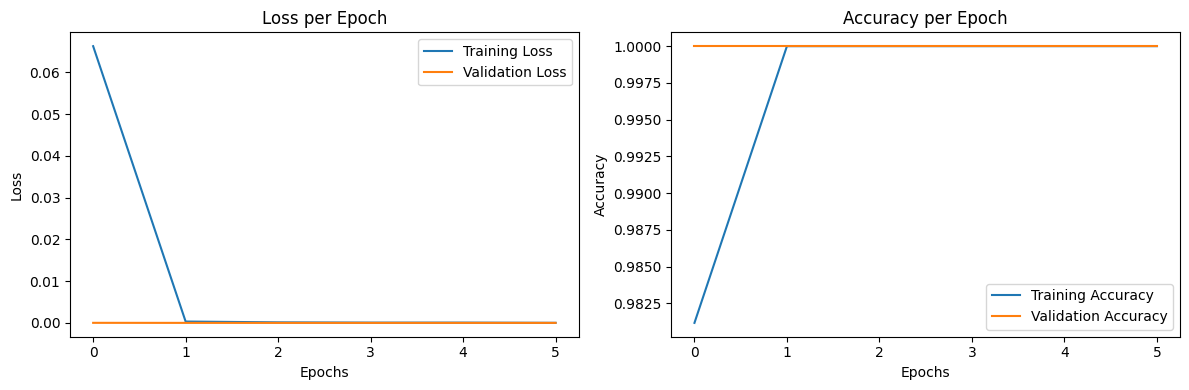

In [244]:
import matplotlib.pyplot as plt

# 17. Plotting hasil training dan validasi
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
